IRIS DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df=df.drop(columns="Id")

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score

In [ ]:
colnames=["sepal_length","sepal_width","petal_length","petal_width","type"]
iris=pd.read_csv("/content/Iris.csv",skiprows=1,names=colnames)
iris

,sepal_length,sepal_width,petal_length,petal_width,type
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
features=["sepal_length","sepal_width","petal_length","petal_width"]
X=iris[features]
y=iris.type

X is the feature matrix, which contains the selected features. It is usually a 2D array or DataFrame.

y is the target variable, representing the labels or classes you are trying to predict. In this case, it seems to be the iris types.

Assuming iris is a DataFrame containing columns like "sepal_length," "sepal_width," "petal_length," "petal_width," and "type," this code extracts the specified features into X and the target variable into y.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)

Split the dataset into training and testing sets using the train_test_split function. The test_size parameter determines the proportion of the dataset used for testing, and random_state ensures reproducibility.

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")

Instance of the DecisionTreeClassifier class named clf. The criterion="entropy" argument specifies that the decision tree should use the information gain based on entropy as the criterion for making decisions during the tree-building process.

In [ ]:
clf=clf.fit(X_train,y_train)

Train the decision tree classifier using the training set (X_train, y_train). The classifier will learn to make predictions based on the input features.

In [ ]:
y_pred=clf.predict(X_test)

Use the trained classifier to make predictions on the test set (X_test). The variable y_pred contains the predicted labels for the test set.

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9333333333333333


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six']=six

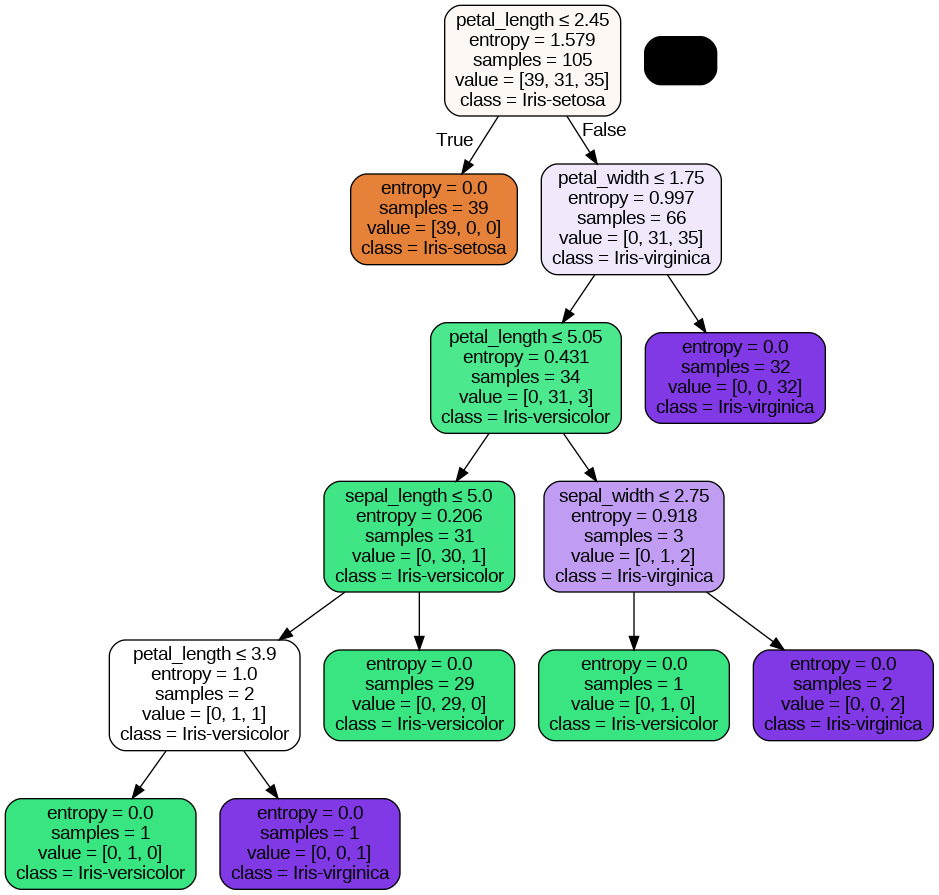

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot=StringIO()
export_graphviz(clf,out_file=dot,filled=True,rounded=True, special_characters=True, feature_names=features,class_names=iris.type.unique())
graph=pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

The code utilizes scikit-learn's export_graphviz function to generate a textual representation of a decision tree (clf) trained on the Iris dataset. This representation is then converted into a PNG image for visualization. The StringIO module is used to capture the dot format representation of the decision tree, which is then passed to the pydotplus library for graph creation. Various options such as filled nodes, rounded corners, and special characters are specified to enhance the visual appeal of the tree. Additionally, feature names and class names are provided for better interpretation. The resulting decision tree graph is saved as a PNG file named 'iris.png,' and the IPython Image module is used to display the decision tree within the Jupyter Notebook or IPython environment. This graphical representation aids in understanding how the decision tree makes classifications based on the specified features of the Iris dataset.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
X,y=make_classification(n_samples=10000,n_features=20,n_informative=5,n_redundant=15, random_state=58)
print(X.shape,y.shape)

(10000, 20) (10000,)


This code generates a synthetic binary classification dataset with 10,000 samples and 20 features using scikit-learn's make_classification function. The features include 5 informative and 15 redundant features. The shapes of the feature matrix (X) and target variable (y) are printed, showing (10,000, 20) for X and (10,000,) for y.

In [ ]:
train_accuracy=[]
test_accuracy=[]
X,y=make_classification(n_samples=10**4,n_features=20,n_informative=5,n_redundant=15, random_state=58)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)
for x in range(1,21):
    clf=DecisionTreeClassifier(max_depth=x,criterion="entropy")
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    test_a=acc(y_test,y_pred)
    test_accuracy.append(test_a)
    y_pred=clf.predict(X_train)
    train_a=acc(y_train,y_pred)
    train_accuracy.append(train_a)
    print(f"Max Depth: {x}\t Train: {train_a}\t Test: {test_a}")

Max Depth: 1	 Train: 0.6755714285714286	 Test: 0.6783333333333333
Max Depth: 2	 Train: 0.7358571428571429	 Test: 0.733
Max Depth: 3	 Train: 0.8025714285714286	 Test: 0.8006666666666666
Max Depth: 4	 Train: 0.824	 Test: 0.816
Max Depth: 5	 Train: 0.8751428571428571	 Test: 0.8543333333333333
Max Depth: 6	 Train: 0.8982857142857142	 Test: 0.88
Max Depth: 7	 Train: 0.913	 Test: 0.882
Max Depth: 8	 Train: 0.9294285714285714	 Test: 0.8933333333333333
Max Depth: 9	 Train: 0.9448571428571428	 Test: 0.9056666666666666
Max Depth: 10	 Train: 0.9564285714285714	 Test: 0.912
Max Depth: 11	 Train: 0.9655714285714285	 Test: 0.914
Max Depth: 12	 Train: 0.9737142857142858	 Test: 0.9066666666666666
Max Depth: 13	 Train: 0.9788571428571429	 Test: 0.9076666666666666
Max Depth: 14	 Train: 0.9831428571428571	 Test: 0.907
Max Depth: 15	 Train: 0.987	 Test: 0.905
Max Depth: 16	 Train: 0.9897142857142858	 Test: 0.9
Max Depth: 17	 Train: 0.9915714285714285	 Test: 0.9023333333333333
Max Depth: 18	 Train: 0.99285

The code begins by generating a synthetic dataset using the make_classification function from scikit-learn, creating 10,000 samples with 20 features, where 5 features are informative, and 15 are redundant. The dataset is then split into training and testing sets with a 70-30 ratio. Subsequently, a loop iterates through maximum depth values from 1 to 20. For each iteration, a Decision Tree Classifier (clf) is trained on the training set with the specified maximum depth and entropy criterion. The classifier's accuracy is then evaluated on both the training and testing sets, and the results are stored in the train_accuracy and test_accuracy lists, respectively. The printed output provides a summary of the maximum depth, training accuracy, and testing accuracy for each iteration. This allows for the examination of how the model's performance changes with different tree depths, aiding in the selection of an optimal maximum depth to balance model complexity and generalization.

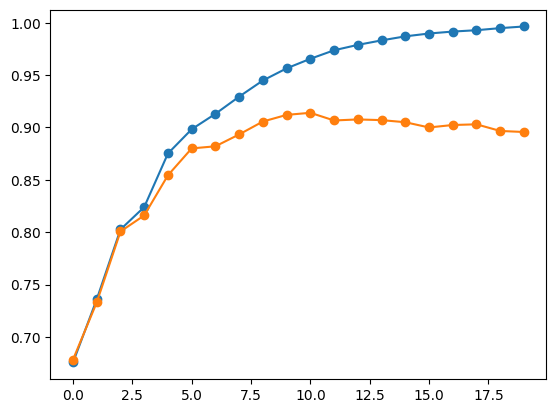

In [ ]:
plt.plot(train_accuracy,"-o")
plt.plot(test_accuracy,"-o")
plt.show()

BREAST CANCER DATASET

In [ ]:
df1=pd.read_csv("/content/Breast_cancer_data.csv")
df1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
df1.dropna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
features=["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]
X=df1[features]
y=df1.diagnosis

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)
train_accuracy=[]
test_accuracy=[]
values=[i for i in range(1,10)]
for i in values:
    clf=DecisionTreeClassifier(max_depth=i)
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    test_accuracy.append(acc(y_test,y_pred))
    y_pred=clf.predict(X_train)
    train_accuracy.append(acc(y_train,y_pred))

The code begins by splitting a dataset (X, y) into training and testing sets using the train_test_split function from scikit-learn. It then initializes empty lists, train_accuracy and test_accuracy, to store the classification accuracies on the training and testing sets, respectively. The variable values is created to represent a range of maximum depths for the decision tree, from 1 to 9. Subsequently, a loop iterates through each maximum depth value, creating a Decision Tree Classifier (clf) with the specified depth and training it on the training set. For each iteration, the classifier's predictions are evaluated on both the training and testing sets, and the accuracies are appended to the corresponding lists. This process allows for the examination of how the model's performance varies with different maximum depths. The resulting train_accuracy and test_accuracy lists can be analyzed or visualized to identify the optimal maximum depth for the Decision Tree Classifier.

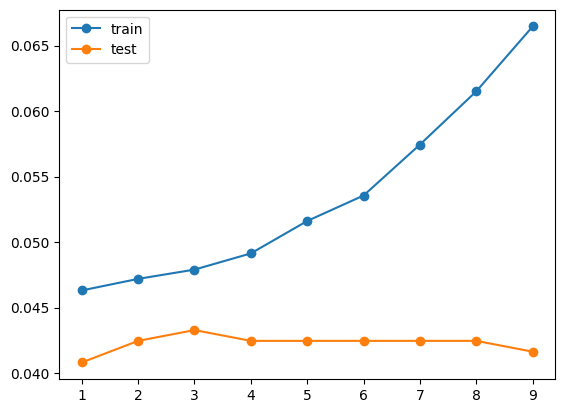

In [ ]:
plt.plot(values,train_accuracy,"-o",label="train")
plt.plot(values,test_accuracy,"-o",label="test")
plt.legend()
plt.show()

In [ ]:
clf=DecisionTreeClassifier(max_depth=6)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",acc(y_test,y_pred))

Accuracy:  0.9122807017543859


The provided code segment focuses on the evaluation of a Decision Tree Classifier with a maximum depth of 6 on a dataset. After initializing the classifier with the specified depth, the model is trained using a training set (X_train, y_train). This training process involves the algorithm learning patterns and relationships within the data to make predictions. Subsequently, the trained classifier is applied to the test set (X_test), and the predicted labels (y_pred) are compared against the actual labels (y_test). The accuracy of the model is then calculated using the acc function, which is assumed to be a custom accuracy calculation function. The final accuracy score is printed to the console, providing insight into the performance of the Decision Tree Classifier with a maximum depth of 6 on the given dataset. This evaluation serves as a snapshot assessment of the model's ability to generalize to new, unseen data, aiding in the understanding of its overall effectiveness.

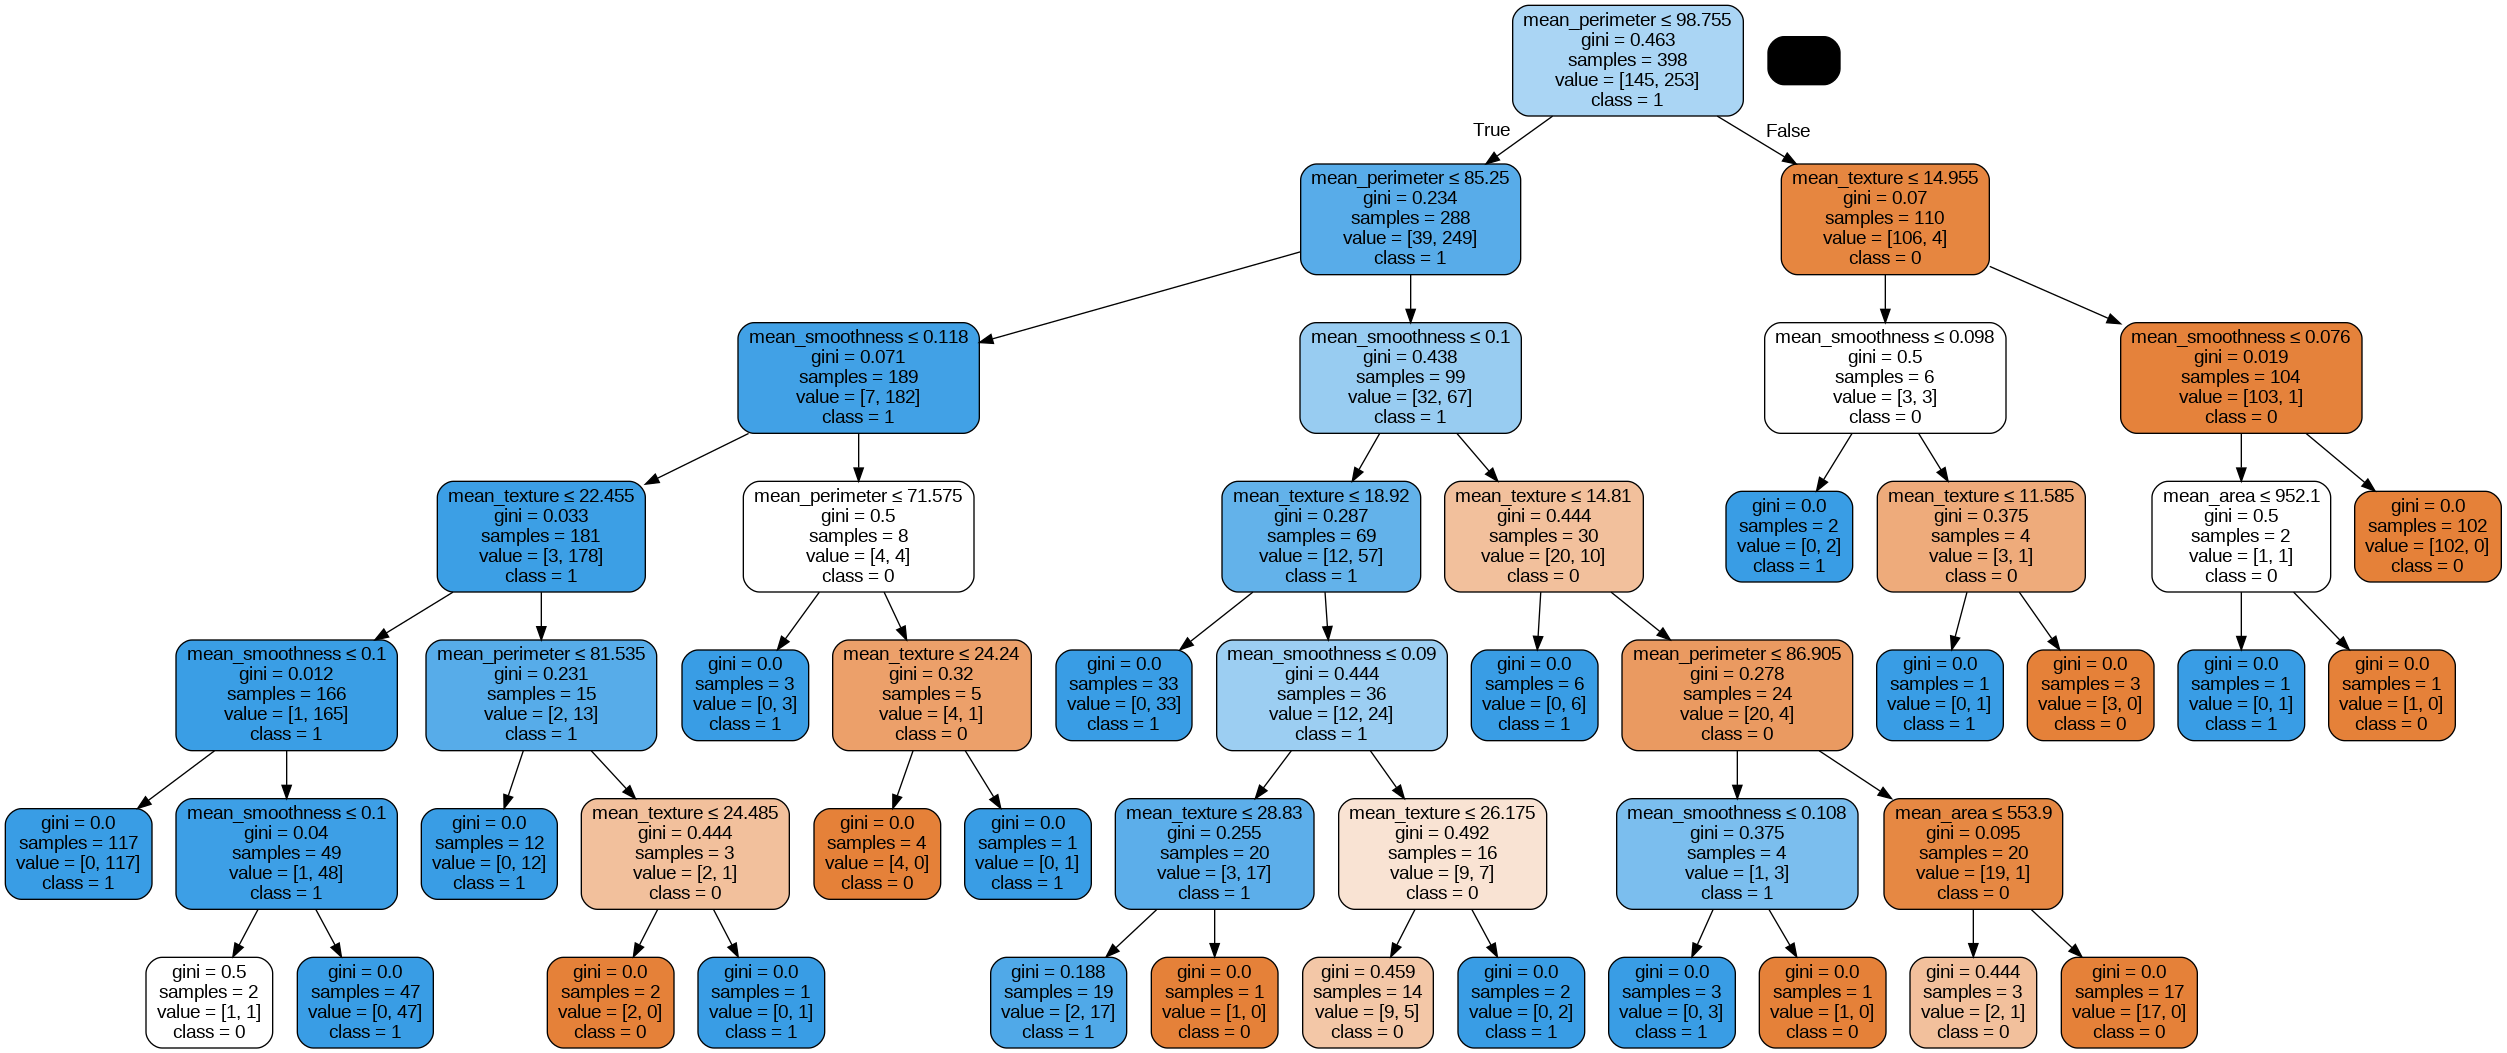

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot=StringIO()
export_graphviz(clf,out_file=dot,filled=True,rounded=True, special_characters=True, feature_names=features,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())


This code generates a visualization of a Decision Tree Classifier (clf) with a maximum depth of 6 using the export_graphviz function from scikit-learn. The resulting graph is converted into a PNG image named 'iris.png'. Key visualization parameters include node filling, rounded corners, and feature and class names. The image is then displayed using IPython's Image module, offering a concise way to interpret and understand the decision-making process of the trained Decision Tree model applied to the given dataset

DESICION TREE REGRESSOR

CAR PREDICTION DATASET

In [ ]:
car=pd.read_csv("carprediction.csv")
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
print(car["Make"].unique())

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


In [ ]:
features=["Year","Engine HP","Engine Cylinders","Number of Doors","highway MPG","city mpg","Popularity"]
X=car[features]
y=car.MSRP
print(X.shape,y.shape)
car.dropna(inplace=True)
y.head()

(8084, 7) (8084,)


0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
train_accuracy=[]
test_accuracy=[]
values=[i for i in range(1,20)]
for i in values:
    reg=DecisionTreeRegressor(max_depth=i)
    reg=reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    test_accuracy.append(reg.score(X_train,y_train))
    y_pred=reg.predict(X_train)
    train_accuracy.append(reg.score(X_test,y_test))

This code segment evaluates the performance of a Decision Tree Regressor with varying maximum depths on a dataset. It splits the dataset into training and testing sets, then iterates through different maximum depth values. For each iteration, a Decision Tree Regressor is trained on the training set, and its performance is assessed using the score method, which computes the coefficient of determination on both the training and testing sets. The results are stored in the train_accuracy and test_accuracy lists, providing insights into how the model's performance changes with different maximum depths. The code aims to identify the optimal maximum depth for the Decision Tree Regressor on the given dataset.

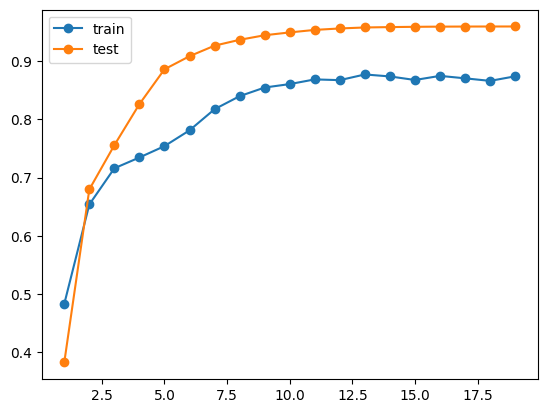

In [ ]:
plt.plot(values,train_accuracy,"-o",label="train")
plt.plot(values,test_accuracy,"-o",label="test")
plt.legend()
plt.show()

In [ ]:
reg=DecisionTreeRegressor(max_depth=13)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.8714606783636692

In this code segment, a Decision Tree Regressor (reg) with a maximum depth of 13 is trained on the training set (X_train, y_train). The trained regressor is then used to predict the target variable on the test set (X_test). The reg.score method is employed to calculate the coefficient of determination  on the test set, providing a numerical measure of how well the Decision Tree Regressor explains the variability in the target variable. The resulting R-squared value represents the goodness of fit of the model on the test data, with higher values indicating a better fit.